## 1. Frame the Problem and Look at the Big Picture

1. Define the objective in business terms.
    - The primary objective is to analyze the Motor Vehicle Collisions data in NYC to identify patterns, correlations, and insights related to traffic collisions to enhance road safety and potentially reduce accident rates.
2. How will your solution be used?
    - The insights derived can be used by the NYC traffic department to implement effective road safety measures, modify existing traffic rules, or even for urban planning purposes.
3. What are the current solutions/workarounds (if any)?
    - As per the given data, the NYPD Motor Vehicle Collisions page and Vision Zero View provide regular updates on collision statistics. This data analysis could complement those sources.
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
    - This problem is primarily a supervised learning problem if you're predicting certain outcomes (like collisions based on factors), but can also involve unsupervised learning for clustering and segmentation (like identifying accident-prone zones). The analysis would most likely be offline, unless there's a continuous stream of data being fed for real-time analytics.
5. How should you performance be measured?
    - This depends on the exact tasks. For predictions, metrics like MAE, RMSE, or precision and recall might be apt. For clustering, silhouette score or Davies-Bouldin index might be relevant.
6. Is the performance measure aligned with the business objective?
    - Yes, if the aim is to reduce collisions and enhance safety, then predicting and understanding factors that lead to collisions align with the objective.
7. What would be the minimum performance needed to reach the business objective?
    - Ideally, we would want very accurate predictions, but a realistic target might be to achieve at least a certain percentage (say 80% or 90%) accuracy or other relevant metrics that stakeholders deem important.
8. what are comparable problems? Can you reuse experience or tools?
    - Other cities or municipalities might have had similar data and problems. Tools and methodologies used for those could be reused.
9. Is human expertise available?
    - The NYPD and the NYC traffic department would be the best sources of human expertise on this matter.
10. How would you solve the problem manually?
    - Manually, one would have to sift through records, tally the most common collision causes, locations, and times, and derive conclusions based on patterns observed over time. This would be immensely time-consuming.
11. List the assumptions you (or others) have made so far.
    - The data provided captures all significant motor vehicle collisions in NYC.
    - The data fields, especially the contributing factors and vehicle types, are accurately filled.
    - The dataset is representative of the larger trend of collisions in NYC.
12. Verify assumptions if possible.
    - For the first assumption, we could verify by comparing the data's volume against the official NYPD collision page.
    - For the second, random audits of the police reports could provide verification.
    - For the third, studying data over a few years and comparing trends might validate the representativeness of the dataset.

# Data Exploratory Analysis: Motor Vehicle Collisions - Crashes

Data Provided by: Police Department (NYPD)

Dataset Owner: NYC OpenData

Data Collection: Motor Vehicle Collisions

Database: [Motor Vehicle Collisions - Crashes](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage. It should be noted that the data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details.For the most accurate, up to date statistics on traffic fatalities, please refer to the NYPD Motor Vehicle Collisions page (updated weekly) or Vision Zero View (updated monthly).

### Columns in this Dataset

| Column Name                        | Description                                                                                                                                                       | Type       |
|-----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| CRASH DATE                         | Occurrence date of collision                                                                                                                                      | Date & Time|
| CRASH TIME                         | Occurrence time of collision                                                                                                                                      | Plain Text |
| BOROUGH                            | Borough where collision occurred                                                                                                                                  | Plain Text |
| ZIP CODE                           | Postal code of incident occurrence                                                                                                                               | Plain Text |
| LATITUDE                           | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)                                                                          | Number     |
| LONGITUDE                          | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)                                                                         | Number     |
| LOCATION                           | Latitude , Longitude pair                                                                                                                                        | Location   |
| ON STREET NAME                     | Street on which the collision occurred                                                                                                                           | Plain Text |
| CROSS STREET NAME                  | Nearest cross street to the collision                                                                                                                            | Plain Text |
| OFF STREET NAME                    | Street address if known                                                                                                                                          | Plain Text |
| NUMBER OF PERSONS INJURED          | Number of persons injured                                                                                                                                        | Number     |
| NUMBER OF PERSONS KILLED           | Number of persons killed                                                                                                                                         | Number     |
| NUMBER OF PEDESTRIANS INJURED      | Number of pedestrians injured                                                                                                                                    | Number     |
| NUMBER OF PEDESTRIANS KILLED       | Number of pedestrians killed                                                                                                                                     | Number     |
| NUMBER OF CYCLIST INJURED          | Number of cyclists injured                                                                                                                                       | Number     |
| NUMBER OF CYCLIST KILLED           | Number of cyclists killed                                                                                                                                        | Number     |
| NUMBER OF MOTORIST INJURED         | Number of vehicle occupants injured                                                                                                                              | Number     |
| NUMBER OF MOTORIST KILLED          | Number of vehicle occupants killed                                                                                                                               | Number     |
| CONTRIBUTING FACTOR VEHICLE 1      | Factors contributing to the collision for designated vehicle                                                                                                      | Plain Text |
| CONTRIBUTING FACTOR VEHICLE 2      | Factors contributing to the collision for designated vehicle                                                                                                      | Plain Text |
| CONTRIBUTING FACTOR VEHICLE 3      | Factors contributing to the collision for designated vehicle                                                                                                      | Plain Text |
| CONTRIBUTING FACTOR VEHICLE 4      | Factors contributing to the collision for designated vehicle                                                                                                      | Plain Text |
| CONTRIBUTING FACTOR VEHICLE 5      | Factors contributing to the collision for designated vehicle                                                                                                      | Plain Text |
| COLLISION_ID                       | Unique record code generated by system. Primary Key for Crash table.                                                                                             | Number     |
| VEHICLE TYPE CODE 1                | Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)                                     | Plain Text |
| VEHICLE TYPE CODE 2                | Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)                                     | Plain Text |
| VEHICLE TYPE CODE 3                | Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)                                     | Plain Text |
| VEHICLE TYPE CODE 4                | Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)                                     | Plain Text |
| VEHICLE TYPE CODE 5                | Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)                                     | Plain Text |


## 2. Get the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

In [554]:
df = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes.csv", dtype={3: 'str'})
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [555]:
df.shape

(2026884, 29)

## 3. Explore the Data
Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary)
2. Create a jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
    - name
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values 
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Possible useful for the task?
    - Type of distribution (Gaussian, uniform, logarithmic, etc).
4. For supervised learning tasks, identify the target attribute(s)
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promissing transformations you may want to apply. 
9. Identify extra data that would be useful (go back to "Get the Data")
10. Document what you learned.

In [556]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026884 entries, 0 to 2026883
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     2026884 non-null  object 
 1   CRASH TIME                     2026884 non-null  object 
 2   BOROUGH                        1396389 non-null  object 
 3   ZIP CODE                       1396149 non-null  object 
 4   LATITUDE                       1796565 non-null  float64
 5   LONGITUDE                      1796565 non-null  float64
 6   LOCATION                       1796565 non-null  object 
 7   ON STREET NAME                 1599570 non-null  object 
 8   CROSS STREET NAME              1266889 non-null  object 
 9   OFF STREET NAME                334941 non-null   object 
 10  NUMBER OF PERSONS INJURED      2026866 non-null  float64
 11  NUMBER OF PERSONS KILLED       2026853 non-null  float64
 12  NUMBER OF PEDE

- Tabular Data: Typically, data with rows and columns
- A 'CRASH DATE' and 'CRASH TIME' columns, useful for identifying trends over time
- Columns indicating location data such as latitude, longitude, zip codes, city names
- The Data is Highly organized, easy to query

In [557]:
df['CRASH DATE'].min(), df['CRASH DATE'].max()

('01/01/2013', '12/31/2022')

This seems to be wrong because the data contains values of year 2023

In [558]:
print(df['CRASH DATE'].dtypes)

object


In [559]:
# Convert 'CRASH DATE' to datetime type
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

In [560]:
print(df['CRASH DATE'].dtypes)

datetime64[ns]


In [561]:
df['CRASH DATE'].min(), df['CRASH DATE'].max()

(Timestamp('2012-07-01 00:00:00'), Timestamp('2023-09-17 00:00:00'))

In [562]:
df['CRASH TIME']

0           2:39
1          11:45
2           6:55
3           9:35
4           8:13
           ...  
2026879    18:05
2026880    21:39
2026881    17:55
2026882    13:15
2026883     3:00
Name: CRASH TIME, Length: 2026884, dtype: object

In [563]:
# Convert 'CRASH TIME' to datetime format and then extract only the time
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')

In [564]:
df['CRASH TIME'].min(), df['CRASH TIME'].max()

(Timestamp('1900-01-01 00:00:00'), Timestamp('1900-01-01 23:59:00'))

In [565]:
# breaking down of the crash date column
df['MONTH'] = df['CRASH DATE'].dt.month
df['YEAR'] = df['CRASH DATE'].dt.year
df['WEEKDAY'] = df['CRASH DATE'].dt.weekday
df['HOUR'] = df['CRASH TIME'].dt.hour

In [566]:
days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Replacing numbers with day names
df['WEEKDAY'] = df['WEEKDAY'].replace(days)

In [567]:
month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replacing numbers with day names
df['MONTH'] = df['MONTH'].replace(month)

In [568]:
df['LATITUDE'] = df['LATITUDE'].astype(float)
df['LONGITUDE'] = df['LONGITUDE'].astype(float)

In [569]:
df.describe()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,YEAR,HOUR
count,2026884,2026884,1.796565e+06,1.796565e+06,2.026866e+06,2.026853e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06,2.026884e+06
mean,2017-05-23 23:00:43.372980480,1900-01-01 13:37:26.493869312,4.062773e+01,-7.375221e+01,3.036560e-01,1.454965e-03,5.528831e-02,7.262379e-04,2.631034e-02,1.115012e-04,2.188068e-01,5.959887e-04,3.123030e+06,2.016881e+03,1.321867e+01
min,2012-07-01 00:00:00,1900-01-01 00:00:00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.012000e+03,0.000000e+00
25%,2014-12-23 00:00:00,1900-01-01 09:40:00,4.066792e+01,-7.397492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.142841e+06,2.014000e+03,9.000000e+00
50%,2017-04-05 00:00:00,1900-01-01 14:17:00,4.072097e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.649670e+06,2.017000e+03,1.400000e+01
75%,2019-06-20 00:00:00,1900-01-01 18:00:00,4.076956e+01,-7.386668e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.156636e+06,2.019000e+03,1.800000e+01
max,2023-09-17 00:00:00,1900-01-01 23:59:00,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.663665e+06,2.023000e+03,2.300000e+01
std,NaN,NaN,1.981143e+00,3.727407e+00,6.948510e-01,4.019531e-02,2.415764e-01,2.742905e-02,1.620021e-01,1.060545e-02,6.559885e-01,2.662909e-02,1.504149e+06,2.946285e+00,5.737825e+00


- 25%, 50% (the median), and 75% percentiles are all 0, but the mean and max are greater than 0, it indicates that a significant majority of the values in those columns are zeros, but there are some non-zero values present which affect the mean and max.
-  The non-zero values in these columns could be outliers or rare occurrences. For instance, in the context of this data, columns like NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS KILLED, etc., having a majority of zeros makes intuitive sense because, fortunately, most motor vehicle collisions might not result in fatalities.
-  The data in these columns is heavily skewed. In this case, it's right-skewed, meaning there are a few large values that pull the mean to the right of the median. 

In [570]:
# removing Longitude Values that are not from NYC:
df.drop(df[(df['LATITUDE'] < 39) | 
           (df['LATITUDE'] > 41) | 
           (df['LONGITUDE'] > -69) | 
           (df['LONGITUDE'] < -74.5)].index, inplace=True)

In [571]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print the percentage of missing values for each column
print(missing_percentage)

VEHICLE TYPE CODE 5              99.582295
CONTRIBUTING FACTOR VEHICLE 5    99.569242
VEHICLE TYPE CODE 4              98.459911
CONTRIBUTING FACTOR VEHICLE 4    98.406709
VEHICLE TYPE CODE 3              93.149401
CONTRIBUTING FACTOR VEHICLE 3    92.900746
OFF STREET NAME                  83.504410
CROSS STREET NAME                37.472558
ZIP CODE                         31.126933
BOROUGH                          31.115116
ON STREET NAME                   21.062755
VEHICLE TYPE CODE 2              18.706736
CONTRIBUTING FACTOR VEHICLE 2    15.268581
LOCATION                         11.387949
LONGITUDE                        11.387949
LATITUDE                         11.387949
VEHICLE TYPE CODE 1               0.629227
CONTRIBUTING FACTOR VEHICLE 1     0.314910
NUMBER OF PERSONS KILLED          0.001533
NUMBER OF PERSONS INJURED         0.000890
CRASH DATE                        0.000000
MONTH                             0.000000
YEAR                              0.000000
WEEKDAY    

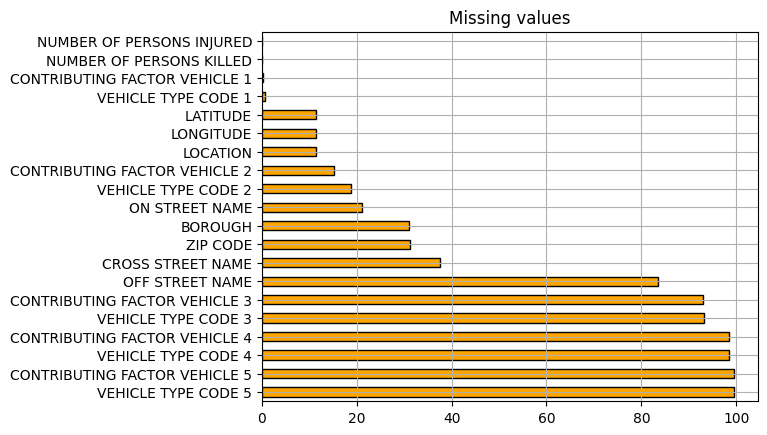

In [572]:
plt.title('Missing values')
missing_percentage[missing_percentage != 0].plot(kind='barh', color='orange', edgecolor='black', grid='true')

plt.show()

In [573]:
def find_non_null_pairs(df, col1, col2):
    
    # This function finds and returns rows where col1 is non-null and col2 is null.
    filtered_rows = df[df[col1].notnull() & df[col2].isnull()]

    # Printing the shape of the filtered DataFrame
    print('Shape of non-null {} and null {}: {}'.format(col1, col2, filtered_rows.shape))
    
    return filtered_rows.head()


In [574]:
find_non_null_pairs(df, 'LOCATION', 'ZIP CODE')

Shape of non-null LOCATION and null ZIP CODE: (435593, 33)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,WEEKDAY,HOUR
6,2021-12-14,1900-01-01 17:05:00,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,December,2021,Tuesday,17
10,2021-12-13,1900-01-01 00:34:00,NaN,NaN,40.701275,-73.888870,"(40.701275, -73.88887)",MYRTLE AVENUE,NaN,NaN,...,4486934,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,December,2021,Monday,0
13,2021-12-14,1900-01-01 00:59:00,NaN,NaN,40.596620,-74.002310,"(40.59662, -74.00231)",BELT PARKWAY,NaN,NaN,...,4486564,Sedan,NaN,NaN,NaN,NaN,December,2021,Tuesday,0
19,2021-12-14,1900-01-01 14:30:00,NaN,NaN,40.783268,-73.824850,"(40.783268, -73.82485)",WHITESTONE EXPRESSWAY,NaN,NaN,...,4486537,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,December,2021,Tuesday,14
21,2021-12-14,1900-01-01 05:46:00,NaN,NaN,40.744644,-73.770410,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,4487122,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,December,2021,Tuesday,5


In [575]:
find_non_null_pairs(df, 'ZIP CODE', 'LOCATION')

Shape of non-null ZIP CODE and null LOCATION: (36376, 33)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,WEEKDAY,HOUR
125,2022-03-22,1900-01-01 09:07:00,BROOKLYN,11238,NaN,NaN,NaN,GRAND AVENUE,GREENE AVENUE,NaN,...,4514139,Sedan,NaN,NaN,NaN,NaN,March,2022,Tuesday,9
144,2022-03-16,1900-01-01 15:44:00,MANHATTAN,10017,NaN,NaN,NaN,49 street,5 avenue,NaN,...,4514194,Bike,NaN,NaN,NaN,NaN,March,2022,Wednesday,15
149,2021-04-13,1900-01-01 16:00:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,4407811,Sedan,NaN,NaN,NaN,NaN,April,2021,Tuesday,16
260,2021-04-13,1900-01-01 17:30:00,QUEENS,11106,NaN,NaN,NaN,33 st,31ave,NaN,...,4408019,Sedan,Sedan,NaN,NaN,NaN,April,2021,Tuesday,17
374,2021-09-08,1900-01-01 16:33:00,MANHATTAN,10001,NaN,NaN,NaN,WEST 33 STREET,7 AVENUE,NaN,...,4456517,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,September,2021,Wednesday,16


In [576]:
find_non_null_pairs(df, 'LOCATION', 'BOROUGH')

Shape of non-null LOCATION and null BOROUGH: (435377, 33)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,WEEKDAY,HOUR
6,2021-12-14,1900-01-01 17:05:00,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,December,2021,Tuesday,17
10,2021-12-13,1900-01-01 00:34:00,NaN,NaN,40.701275,-73.888870,"(40.701275, -73.88887)",MYRTLE AVENUE,NaN,NaN,...,4486934,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,December,2021,Monday,0
13,2021-12-14,1900-01-01 00:59:00,NaN,NaN,40.596620,-74.002310,"(40.59662, -74.00231)",BELT PARKWAY,NaN,NaN,...,4486564,Sedan,NaN,NaN,NaN,NaN,December,2021,Tuesday,0
19,2021-12-14,1900-01-01 14:30:00,NaN,NaN,40.783268,-73.824850,"(40.783268, -73.82485)",WHITESTONE EXPRESSWAY,NaN,NaN,...,4486537,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,December,2021,Tuesday,14
21,2021-12-14,1900-01-01 05:46:00,NaN,NaN,40.744644,-73.770410,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,4487122,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,December,2021,Tuesday,5


- I could consider utilizing the average latitude and longitude values for the specific zip codes to substitute the missing latitude and longitude information for particular crash and vice versa.
- On the other hand, I could used the Location to figure out or the Borough of crash that is missing the Borough

In [741]:
df_2023 = df[df['CRASH DATE'].dt.year == 2023].copy()
df_2022 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2021 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2020 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2019 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2018 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2017 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2016 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2015 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2014 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2013 = df[df['CRASH DATE'].dt.year == 2022].copy()
df_2012 = df[df['CRASH DATE'].dt.year == 2022].copy()

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

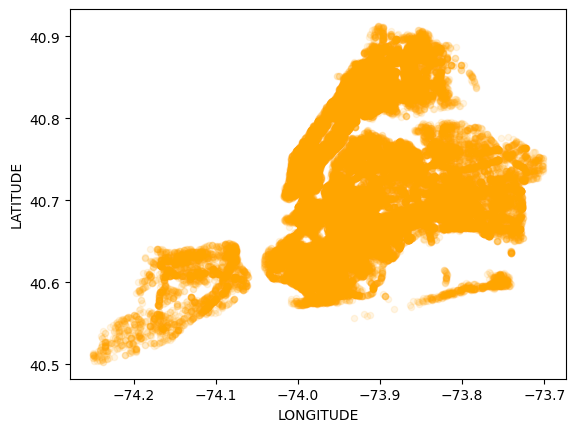

In [742]:
df_2023.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1, color='orange')

In [743]:
borough_accident_counts = df_2023.groupby('BOROUGH')['BOROUGH'].count()
borough_accident_counts

BOROUGH
BRONX             7427
BROOKLYN         16041
MANHATTAN         8157
QUEENS           12213
STATEN ISLAND     1825
Name: BOROUGH, dtype: int64

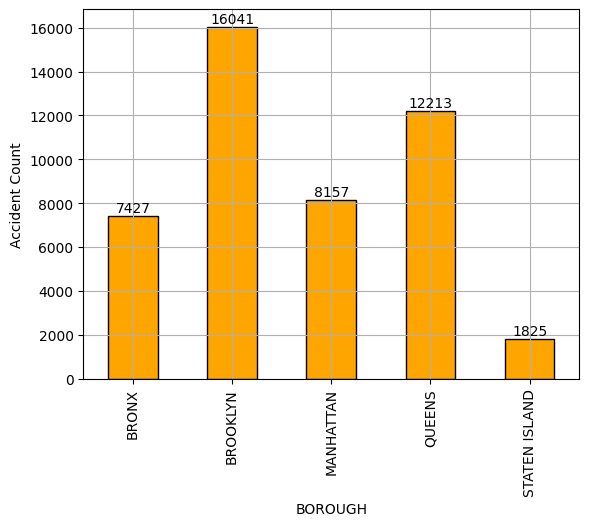

In [744]:
# Plot the counts as a bar plot
ax = borough_accident_counts.plot(kind='bar', color='orange', edgecolor='black', grid='true')

# Label x-axis and y-axis
plt.xlabel('BOROUGH')
plt.ylabel('Accident Count')

# Annotate each bar with the count
for i, v in enumerate(borough_accident_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center', va='bottom')
    
plt.show()

- For the Year 2023, most of the accidents occur in Brooklyn and Queens, probabilly due to the fact that Brooklyn and Queens are the most populated Borough in New York City
- According to https://www.citypopulation.de/en/usa/newyorkcity/ the population of the 5 Borought:
    - Bronx 1,379,946
    - Brooklyn 2,590,516
    - Manhattan 1,596,273
    - Queens 2,278,029
    - Staten Island 491,133

### Chi-Square test for indepence

To investigate if the number of accidents in each borough is related to the population of each borough. In this test, I will compare the observed number of accidents in each borough to the number that would be expected if accidents were evenly distributed based on population.

In [745]:
from scipy.stats import chi2_contingency

# Population counts (remove commas and convert to integers)
population = [1379946, 2590516, 1596273, 2278029, 491133]

# Calculate the expected accidents based on population
total_accidents = sum(borough_accident_counts) 
total_population = sum(population)
expected_accidents = [total_accidents * (pop / total_population) for pop in population]

# Conduct the chi-square test
chi2, p, dof, _ = chi2_contingency([borough_accident_counts, expected_accidents])

print(f"Chi2 value: {chi2:.2f}")
print(f"Degrees of Freedom: {dof:.2f}")
print(f"P-value: {p:.2f}")

Chi2 value: 303.54
Degrees of Freedom: 4.00
P-value: 0.00


- The chi-square value of 303.54 and a p-value of 0.00 indicates that there is a significant association between the number of accidents and the population in each borough. Since the p-value is less than the typical significance level of 0.05, we can succesfully reject the null hypothesis.

- In other words, the results suggest that the number of accidents in each borough is not independent of the population of the borough. There seems to be a relationship between the borough population size and the number of accidents.

- However, remember that correlation does not imply causation. While the number of accidents is associated with population size, it does not mean that a larger population causes more accidents. Other factors could be influencing the number of accidents in each borough; therefore a more comprehensive analysis including other potential variables should be consider for a more specific test result. 

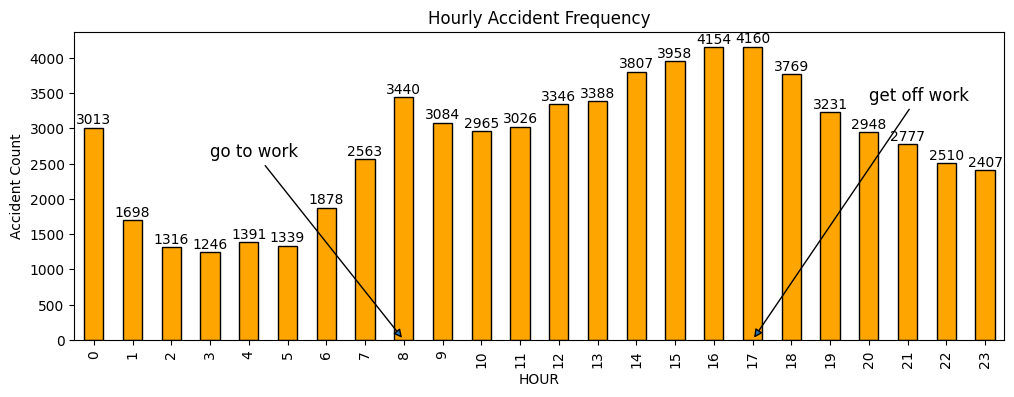

In [746]:
# New Yorkers usually go to work at 9am and finish at 5pm
# Hence New Yorkers start driving at 8am to get to their jobs and they start driving at 5pm to get to their homes

hour_accident_counts = df_2023.groupby('HOUR')['HOUR'].count()

plt.figure(figsize=(12, 4))

# Plot the counts as a bar plot
ax = hour_accident_counts.plot(kind='bar', color='orange', edgecolor='black')

# Label x-axis and y-axis
plt.xlabel('HOUR')
plt.ylabel('Accident Count')

# Annotate each bar with the count
for i, v in enumerate(hour_accident_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

plt.annotate('go to work',xy=(8,0),xytext=(3,2600),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(17,0),xytext=(20,3400),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

plt.title('Hourly Accident Frequency')

plt.show()

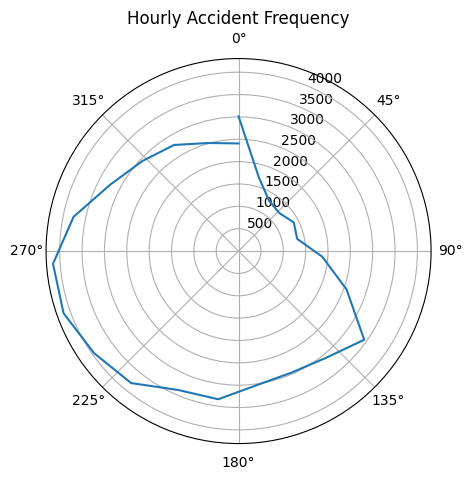

In [747]:
theta = np.linspace(0, 2*np.pi, len(hour_accident_counts))
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)
ax.plot(theta, hour_accident_counts)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.title('Hourly Accident Frequency')
plt.show()


The highest frequency of accidents coincides with the time when people are commuting to and from work. A notable surge is observed at the conclusion of typical working hours. This pattern strongly suggests a link between work-related stress and the incidence of car accidents.

In [748]:
weekly_accident_counts

WEEKDAY
Monday        9530
Tuesday       9436
Wednesday     9550
Thursday      9738
Friday       10238
Saturday      9536
Sunday        9386
Name: WEEKDAY, dtype: int64

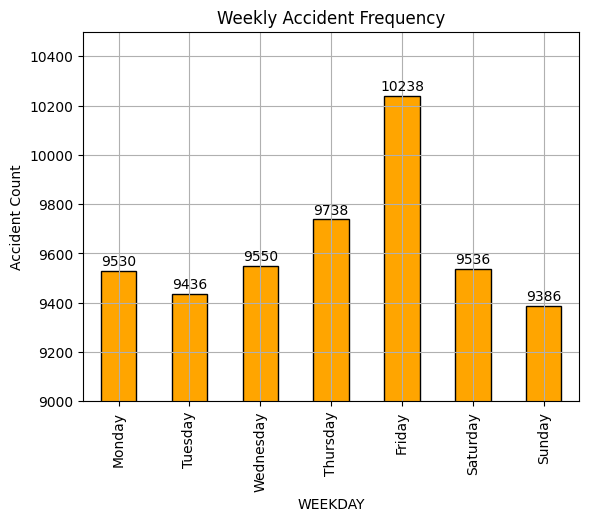

In [749]:
# Specifying the correct order for the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_2023['WEEKDAY'] = pd.Categorical(df_2023['WEEKDAY'], categories=days_order, ordered=True)

weekly_accident_counts = df_2023.groupby('WEEKDAY', observed=True)['WEEKDAY'].count()

# Plot the counts as a bar plot
ax = weekly_accident_counts.plot(kind='bar', color='orange', edgecolor='black', grid='true')

# Label x-axis and y-axis
plt.xlabel('WEEKDAY')
plt.ylabel('Accident Count')

# Annotate each bar with the count
for i, v in enumerate(weekly_accident_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

# Set y-axis range
ax.set_ylim(9000, 10500)
    
plt.title('Weekly Accident Frequency')
plt.show()

There are more accidents on weekdays with the peak being on Friday. There are fewer chances of being in a car accident on the weekends.

### Chi-Square Goodness-of-Fit test

Chi-Square Goodness-of-Fit test could be used to determine if the observed distribution of accident counts across days of the week significantly differs from an expected uniform distribution (i.e., no difference in accident counts across days of the week).

In [750]:
from scipy.stats import chisquare

# Perform Chi-Square Goodness-of-Fit Test
chi2, p = chisquare(weekly_accident_counts)

print(f"Chi2 value: {chi2:.2f}")
print(f"P-value: {p:.2f}")

Chi2 value: 52.31
P-value: 0.00


The chi-square value of 52.31 and a p-value of 0.00 indicates that there is a statistically significant difference in the accident counts across different days of the week. Since the p-value is less than the typical significance level of 0.05, we can succesfully reject the null hypothesis and conclude that there is a significant difference in the number of accidents across different days of the week.

In [751]:
df_2023['MONTH']

115932     July
116554     July
116673     July
145815     July
152001     July
           ... 
2026879    July
2026880    July
2026881    July
2026882    July
2026883    July
Name: MONTH, Length: 67414, dtype: object

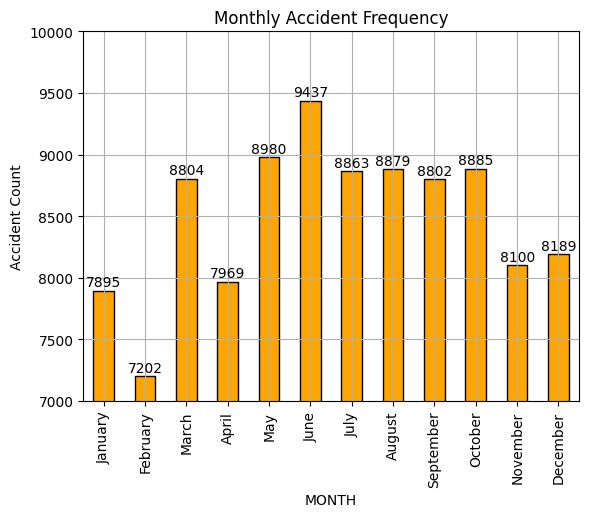

In [752]:
# Specifying the correct order for the days of the week
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_2022['MONTH'] = pd.Categorical(df_2022['MONTH'], categories=month_order, ordered=True)

monthly_accident_counts = df_2022.groupby('MONTH', observed=True)['MONTH'].count()

# Plot the counts as a bar plot
ax = monthly_accident_counts.plot(kind='bar', color='orange', edgecolor='black', grid='true')

# Label x-axis and y-axis
plt.xlabel('MONTH')
plt.ylabel('Accident Count')

# Annotate each bar with the count
for i, v in enumerate(monthly_accident_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

# Set y-axis range
ax.set_ylim(7000, 10000)
    
plt.title('Monthly Accident Frequency')
plt.show()

### Chi-Square Goodness-of-Fit test

Chi-Square Goodness-of-Fit test could be used to determine if the observed distribution of accident counts across month of the week significantly differs from an expected uniform distribution (i.e., no difference in accident counts across months).

In [753]:
from scipy.stats import chisquare

# Perform Chi-Square Goodness-of-Fit Test
chi2, p = chisquare(monthly_accident_counts)

print(f"Chi2 value: {chi2:.2f}")
print(f"P-value: {p:.2f}")

Chi2 value: 506.46
P-value: 0.00


The chi-square value of 506.46 and a p-value of 0.00 indicates that there is a statistically significant difference in the accident counts across different months of the year. Since the p-value is less than the typical significance level of 0.05, we can succesfully reject the null hypothesis and conclude that there is a significant difference in the number of accidents across different months of the year.

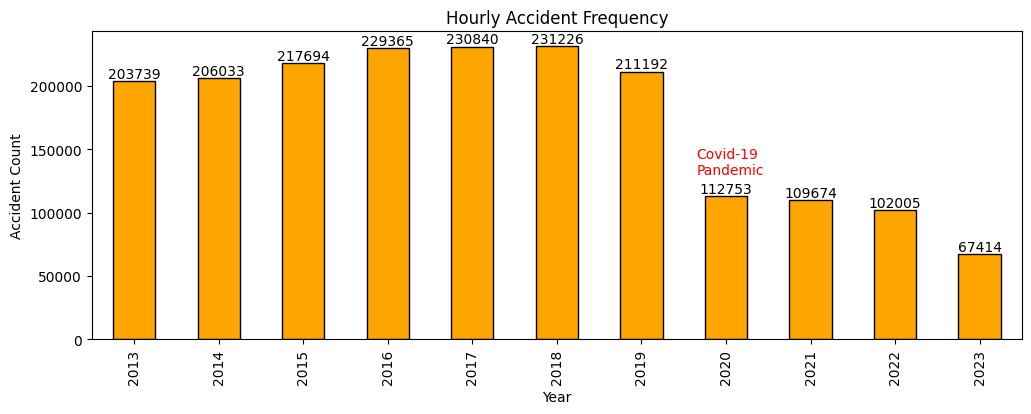

In [754]:
year_accident_counts = df[df['YEAR'] > 2012].copy().groupby('YEAR')['YEAR'].count()

plt.figure(figsize=(12, 4))

# Plot the counts as a bar plot
ax = year_accident_counts.plot(kind='bar', color='orange', edgecolor='black')

# Label x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Accident Count')

# Annotate each bar with the count
for i, v in enumerate(year_accident_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

plt.annotate('Covid-19\nPandemic',xy=(6.65,130000), fontsize=10, color='red')

plt.title('Hourly Accident Frequency')

plt.show()

In [755]:
from sklearn.linear_model import LinearRegression

In [756]:
# Convert the series to a DataFrame
year_counts_df = year_accident_counts.rename_axis('YEAR').reset_index(name='Count')
year_counts_df

,YEAR,Count
0,2013,203739
1,2014,206033
2,2015,217694
3,2016,229365
4,2017,230840
5,2018,231226
6,2019,211192
7,2020,112753
8,2021,109674
9,2022,102005


In [757]:
before_covid = year_counts_df[year_counts_df['YEAR'] < 2019]
after_covid = year_counts_df[year_counts_df['YEAR'] >= 2019]

Slope (Coefficient): [6386.48571429]
Intercept: -12652145.790476194


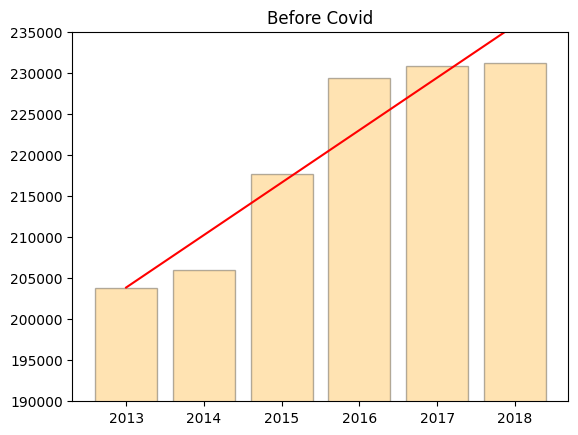

In [758]:
def plot_lm(data):
    
    # Extracting the features and target
    X = data[['YEAR']]  # Features (Year)
    y = data['Count']   # Target (Count)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    # To make predictions
    predictions = model.predict(X)

    # Plotting the actual data as scatter plot
    plt.bar(X['YEAR'].values, y, color='orange', edgecolor='black', alpha=0.3, label='Actual Counts')

    # Plotting the predicted values as line plot
    plt.plot(X['YEAR'].values, predictions, color='red', label='Linear Regression Line')

    # Set y-axis range
    # plt.ylim(190000, 235000)

    # The coefficients
    slope = model.coef_
    intercept = model.intercept_

    print(f"Slope (Coefficient): {slope}")
    print(f"Intercept: {intercept}")
    
plot_lm(before_covid)
plt.title('Before Covid')
plt.ylim(190000, 235000)
plt.show()

Slope (Coefficient): [-29830.4]
Intercept: 60407846.0


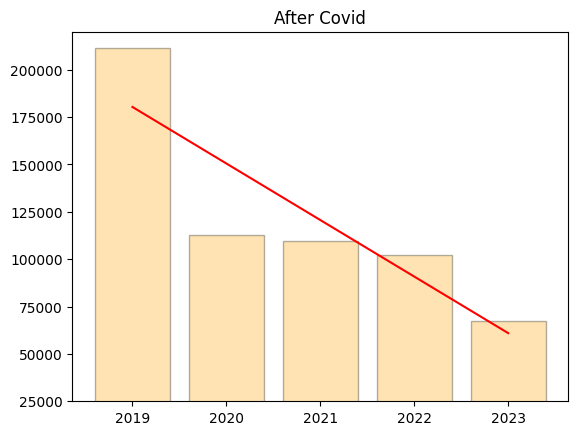

In [759]:
plot_lm(after_covid)
plt.title('After Covid')
plt.ylim(25000, 220000)
plt.show()

**Pre-Covid Model:**
- Slope (Coefficient): 6386.49
    - This suggests that for each additional year, the count was increasing by approximately 6386 units. In other words, the amount of accidents was icnreasing yearly. 

**Post-Covid Model:**
- Slope (Coefficient): -29830.4
    - The negative slope suggests a decrease in the count by approximately 29830 units for each additional year after COVID. This indicates a downward trend in the data post-COVID.
    
**Conclusion:**
From the two models, you can observe that there is a clear change in trend from before to after COVID. While the count was increasing each year before COVID, it is now decreasing each year after COVID, as indicated by the negative slope in the post-COVID model.

In [760]:
df_2022['VEHICLE TYPE CODE 1'].value_counts()

VEHICLE TYPE CODE 1
Sedan                                  47829
Station Wagon/Sport Utility Vehicle    35451
Taxi                                    2594
Pick-up Truck                           2160
Bus                                     1837
                                       ...  
COMMERICAL                                 1
AMBULACE                                   1
RV                                         1
FORK LIFT                                  1
ELE MOTORC                                 1
Name: count, Length: 347, dtype: int64

In [761]:
df_2022['VEHICLE TYPE CODE 1'] = df_2022['VEHICLE TYPE CODE 1'].str.lower().copy()

replacement_dict = {
    'sedan': ['sedan', 'taxi', '3-door', 'convertible', 'sonata', 'pas (4dr s', 'yellow tax', '2 dr sedan', '4 dr sedan'],
    'motorcycle': ['motorcycle', 'mopad', 'motor scoo', 'motorbike', 'motorized', 'moped 150c', '50cc scoot', 'mopd', 'moped', 'motorscooter'],
    'bicycle': ['bike', 'e-bike', 'e bike', 'e bike w p', 'bicycle', '2 wheel sc', 'pedicab', 'e bike uni'],
    'suv': ['suv', 'station wagon/sport utility vehicle'],
    'emergency_vehicle': ['ambulance', 'amb', 'nys ambula', 'ems', 'ambu', 'fire truck', 'fdny truck', 'firetruck', 'fire', 'fire engin', 'fire truvk', 'nypd', 'police veh', 'nypd tow t', 'ems truck', 'fdny ambul', 'emt ambula', 'fdny ladde', 'ambulace', 'abulance', 'ambulette', 'fire appar', 'fdny engin'],
    'truck': ['box truck', 'pick-up truck', 'flat bed', 'pick-up', 'garbage truck', 'tractor truck', 'tow truck', 'tractor truck gasoline', 'chassis cab', 'dump', 'tow', 'usps', 'tow truck / wrecker', 'tanker', 'hopper', 'usps truck', 'trailer', 'commercial', 'dump truck', 'road sweep', 'ford picku', 'pickup', 'pickup tru', 'pick up tr', 'tractor truck diesel', 'pick-up tr', 'pick up', 'truck', 'delivery', 'us postal', 'mail truck', 'freight', 'freight tr', 'freightlin', 'frieg', 'fedex truc', 'usps  van', 'fed ex tru', 'work truck', 'pickup with mounted camper', 'delivery t', 'delivery v', 'bucket tru', 'dumptruck', 'usps small', 'utility tr', 'u-haul', 'citywide', 'fdny ems', 'truck w/tr', 'tractor tr', 'penske box'],
    'bus': ['bus', 'school bus', 'mta bus', 'nyc transi', 'schoolbus', 'ems bus', 'nj transit', 'transit'],
    'van': ['van', 'minivan', 'mini van', 'van truck', 'van camper', 'refrigerated van', 'sprinter v', 'usps van', 'nycha van', 'sprinter w', 'mail', 'nyc sanita', 'verzion va', 'city of ne', 'city vehic', 'postal tru', 'postal ser', 'city owned', 'limousine', 'usps mail', 'limo'],
    'utility_vehicle': ['utility', 'carry all', 'bulk agriculture', 'uspcs', 'usps mail', 'lift', 'garbage or refuse', 'power shov', 'forklift', 'cat forkli', 'fork lift', 'lift boom', 'tractor', 'well driller', 'utility ve', 'ny city mt', 'fedex box', 'utility_vehicle', 'util', 'fedex box'],
    'other': ['unk', 'unknown', 'other', '.', 'self', 'tl', 'rz', 'd2', '7', 'sweeper', '999', '997', 'a,n', 'ss', 'psd', 'app', 'pallet', 'trolley ri', 'com', 'stak', 'commerical', 'government', 'promaster', 'con ed tru', 'ele motorc', 'armored truck', 'revel', 'tcn', 'log', 'tr', 'spr', 'mac', 'p psd', 'mta', '100th truc', 'sanitation', 'fdny', 'self insur', 'food cart', 'concrete mixer', 'house on w', 'snow plow', 'bobcat', 'backhoe', 'excavator', 'gator 4x4', 'beverage truck', 'asphalt ro', 'golf cart', 'lunch wagon', 'stake or rack', 'livestock rack', 'enclosed body - nonremovable enclosure', 'open body', 'flatbed to', 'usps posta', 'f550 esu r', 'fdny fire', 'backhoe re', 'scooter', 'e-scooter', 'gas scoote', 'razor150 m', 'motorized home', 'motorscoot', 'e scooter', 'ice cream', 'jetski', 'skateboard', 'multi-wheeled vehicle', 'minibike', 'minicycle', '50cc mini', 'mopped', 'dirt bike', 'chassis &', 'road sweep', 'motorized home', 'pickup', 'in line sk', 'electric s', 'ems fdny b', 'com delive', 'pass', 'rmp', 'fd truck', 'govt', 'pepsi deli', 'combinatio', 'crf carria', 'tlc', 'petit cab', 'mta van', 'gas moped', 'mail carri', 'principle', 'garbage', 'garbage tr', 'nyc parks', 'sp purpose', 'ups truck', 'street', 'mack', 'street swe', 'utility tr', 'rv', 'motorized home', 'gmc ecom', 'yw school', 'f550', 'suburban', 'pk', 'flat rack', 'ford', 'passenger', 'utv', 'tank', 'm2', 'carriage', 'delv']
}

# Reverse the mapping to create the replacement dictionary for the replace() function
replace_dict = {old: new for new, old_list in replacement_dict.items() for old in old_list}

# Use the replace() function to update the DataFrame in place
df_2022['VEHICLE TYPE CODE 1'] = df_2022['VEHICLE TYPE CODE 1'].replace(replace_dict)
df_2022['VEHICLE TYPE CODE 2'] = df_2022['VEHICLE TYPE CODE 2'].replace(replace_dict)
df_2022['VEHICLE TYPE CODE 3'] = df_2022['VEHICLE TYPE CODE 3'].replace(replace_dict)
df_2022['VEHICLE TYPE CODE 4'] = df_2022['VEHICLE TYPE CODE 4'].replace(replace_dict)
df_2022['VEHICLE TYPE CODE 5'] = df_2022['VEHICLE TYPE CODE 5'].replace(replace_dict)

In [762]:
df_2022['VEHICLE TYPE CODE 1'].value_counts()

VEHICLE TYPE CODE 1
sedan                50716
suv                  35456
truck                 5657
bicycle               2539
bus                   1869
motorcycle            1306
other                 1173
emergency_vehicle      799
van                    676
utility_vehicle        384
Name: count, dtype: int64

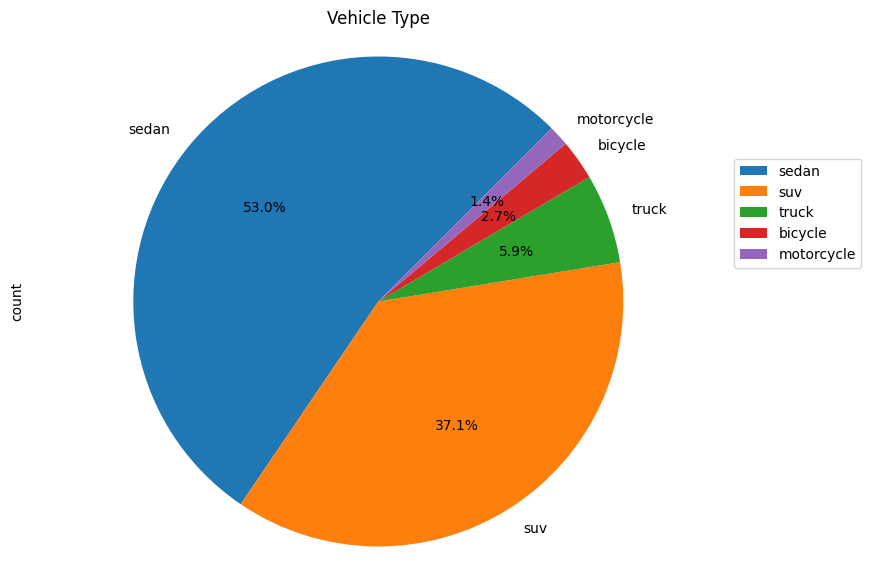

In [763]:
# Filter the DataFrame to exclude 'other'
vehicles_df = df_2022[~df_2022['VEHICLE TYPE CODE 1'].isin(['other', 'utility_vehicle', 'van', 'emergency_vehicle', 'bus'])].copy()

# Get the value counts of 'VEHICLE TYPE CODE 1'
vehicle_counts = vehicles_df['VEHICLE TYPE CODE 1'].value_counts()

plt.figure(figsize=(9, 7))

# Plot the pie chart
vehicle_counts.plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(vehicle_counts.keys(), loc='lower left', bbox_to_anchor=(1,0.55))

plt.title('Vehicle Type')
plt.show()

1. **Predominance of Sedans and SUVs:**
    - Sedans are the most common type of vehicle involved in accidents, accounting for a substantial portion (50,714) of the total. This could be due to their popularity and ubiquity on roads.
    - SUVs follow as the second most common vehicle type in accidents, with a count of 35,456.
2. **Commercial and Larger Vehicles:**
    - Trucks and buses, which are larger and used for commercial purposes, are also involved in accidents but in significantly lower numbers (5,868 and 1,869 respectively).
3. **Two-Wheelers and Smaller Vehicles:**
    - Two-wheel vehicles like motorcycles and bicycles have been involved in 2,177 and 1,668 accidents respectively. Their smaller size and vulnerability might contribute to these incidents.
4. **Emergency and Utility Vehicles:**
    - Emergency vehicles and utility vehicles have lower counts of accidents (799 and 173 respectively). Their specialized use and trained drivers might contribute to the lower accident rates.
5. **Least Involvement of Vans:**
    - Vans have the least involvement in accidents among the listed vehicle types, with only 676 reported incidents.
6. **Other Vehicles:**
    - The category labeled other encompasses various other vehicle types and accounts for 1,175 of the accidents.

In [764]:
# drop meaningless factors
df_factors = df[~df['CONTRIBUTING FACTOR VEHICLE 1'].isin(['Unspecified', 'Other Vehicular'])]
df_factors['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           402321
Failure to Yield Right-of-Way                            119362
Following Too Closely                                    107748
Backing Unsafely                                          75092
Passing or Lane Usage Improper                            55610
Turning Improperly                                        50027
Passing Too Closely                                       49943
Fatigued/Drowsy                                           47350
Unsafe Lane Changing                                      39791
Traffic Control Disregarded                               35368
Driver Inexperience                                       31422
Unsafe Speed                                              27142
Alcohol Involvement                                       21741
Lost Consciousness                                        20379
Reaction to Uninvolved Vehicle                            19549
Pavement S

In [779]:
df_2023['CONTRIBUTING FACTOR VEHICLE 1'] = df_2023['CONTRIBUTING FACTOR VEHICLE 1'].str.lower().copy()

factor_replacement_dict = {
    
    'electronic distractions': [
        'cell phone (hand-held)', 'cell phone (hands-free)', 'distractions',
        'texting', 'listening/using headphones', 'other electronic device'
    ],
    'impairments': [
        'fatigued/drowsy', 'alcohol involvement', 'lost consciousness', 'illnes',
        'prescription medication', 'illness', 'drugs (illegal)', 'fell asleep',
        'eating or drinking'
    ],
    'external_factors': [
        'outside car distraction', 'view obstructed/limited', 'glare',
        'obstruction/debris', 'reaction to uninvolved vehicle', 
        'reaction to other uninvolved vehicle', 'pavement slippery'
    ],
    'vehicle_defects': [
        'brakes defective', 'tire failure/inadequate', 'accelerator defective',
        'steering failure', 'tow hitch defective', 'headlights defective', 
        'other lighting defects', 'windshield inadequate', 'shoulders defective/improper'
    ],
    'other': [
        'oversized vehicle', 'physical disability', 'pedestrian/bicyclist/other pedestrian error/confusion',
        'passenger distraction', 'animals action', 'driverless/runaway vehicle',
        'using on board navigation device', 'vehicle vandalism','traffic control disregarded', 
        'unsafe speed', 'unspecified', 'other vehicular', 'tinted windows', 'vehicle_defects', 
        'driver inexperience'
    ]
}

# Reverse the mapping to create the replacement dictionary for the replace() function
factor_replace_dict = {old: new for new, old_list in factor_replacement_dict.items() for old in old_list}

# Use the replace() function to update the DataFrame in place
df_2023['CONTRIBUTING FACTOR VEHICLE 1'] = df_2023['CONTRIBUTING FACTOR VEHICLE 1'].replace(factor_replace_dict)
df_2023['CONTRIBUTING FACTOR VEHICLE 2'] = df_2023['CONTRIBUTING FACTOR VEHICLE 2'].replace(factor_replace_dict)
df_2023['CONTRIBUTING FACTOR VEHICLE 3'] = df_2023['CONTRIBUTING FACTOR VEHICLE 3'].replace(factor_replace_dict)
df_2023['CONTRIBUTING FACTOR VEHICLE 4'] = df_2023['CONTRIBUTING FACTOR VEHICLE 4'].replace(factor_replace_dict)
df_2023['CONTRIBUTING FACTOR VEHICLE 5'] = df_2023['CONTRIBUTING FACTOR VEHICLE 5'].replace(factor_replace_dict)

In [780]:
df_2023['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
other                                          26057
driver inattention/distraction                 16940
failure to yield right-of-way                   4471
following too closely                           4367
passing or lane usage improper                  3021
passing too closely                             2281
external_factors                                2071
backing unsafely                                2025
impairments                                     1967
turning improperly                              1619
unsafe lane changing                            1368
aggressive driving/road rage                     590
failure to keep right                             88
pavement defective                                61
electronic distractions                           39
traffic control device improper/non-working       25
lane marking improper/inadequate                  19
Name: count, dtype: int64

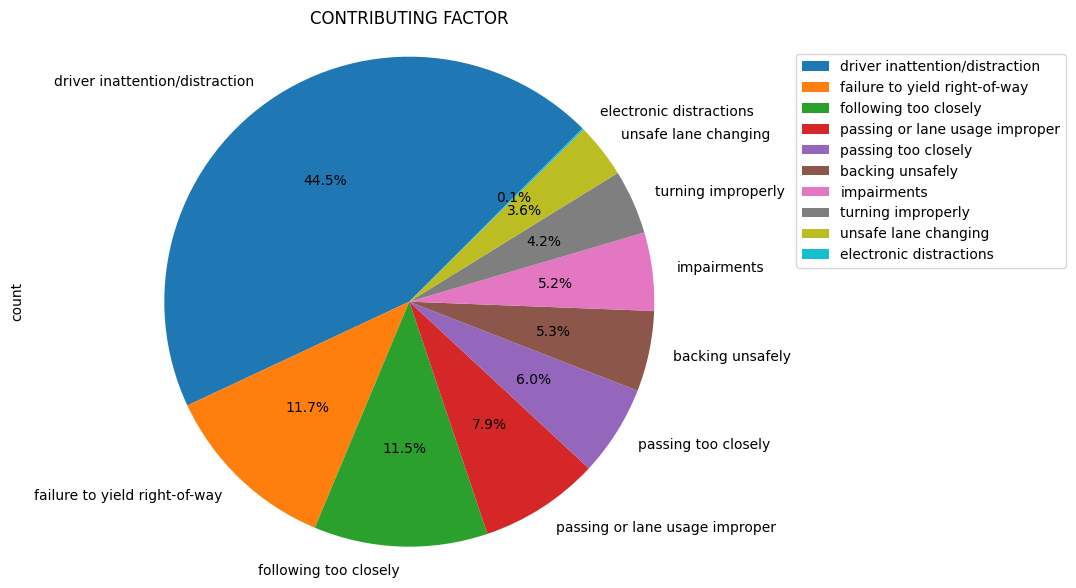

In [787]:
# Filter the DataFrame to exclude 'other'
factors_df = df_2023[~df_2023['CONTRIBUTING FACTOR VEHICLE 1'].isin(['traffic control device improper/non-working', 'pavement defective', 'aggressive driving/road rage', 'vehicle_defects', 'driver inexperience', 'lane marking improper/inadequate', 'external_factors', 'failure to keep right', 'other'])].copy()

# Get the value counts of 'VEHICLE TYPE CODE 1'
factor_counts = factors_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

plt.figure(figsize=(9.8, 7))

# Plot the pie chart
factor_counts.plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(factor_counts.keys(), loc='lower left', bbox_to_anchor=(1,0.55))

plt.title('CONTRIBUTING FACTOR')
plt.show()

In [803]:
# Filter the DataFrame to exclude 'other'
city_factors = ['traffic control device improper/non-working', 'pavement defective', 'lane marking improper/inadequate']

# factors_df = df_2023[(df_2023['CONTRIBUTING FACTOR VEHICLE 1'].isin(city_factors))
#                     | (df_2023['CONTRIBUTING FACTOR VEHICLE 2'].isin(city_factors))
#                     | (df_2023['CONTRIBUTING FACTOR VEHICLE 3'].isin(city_factors))
#                     | (df_2023['CONTRIBUTING FACTOR VEHICLE 4'].isin(city_factors))
#                     | (df_2023['CONTRIBUTING FACTOR VEHICLE 5'].isin(city_factors))
#                     ].copy()

factors_df = df_2023[(df_2023['CONTRIBUTING FACTOR VEHICLE 1'].isin(city_factors))].copy()

# Get the value counts of 'VEHICLE TYPE CODE 1'
factor_counts = factors_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
factor_counts

CONTRIBUTING FACTOR VEHICLE 1
pavement defective                             61
traffic control device improper/non-working    25
lane marking improper/inadequate               19
Name: count, dtype: int64

In [806]:
# format the numbers inside of pie chart. Besides Percentage it also outputs the sum
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

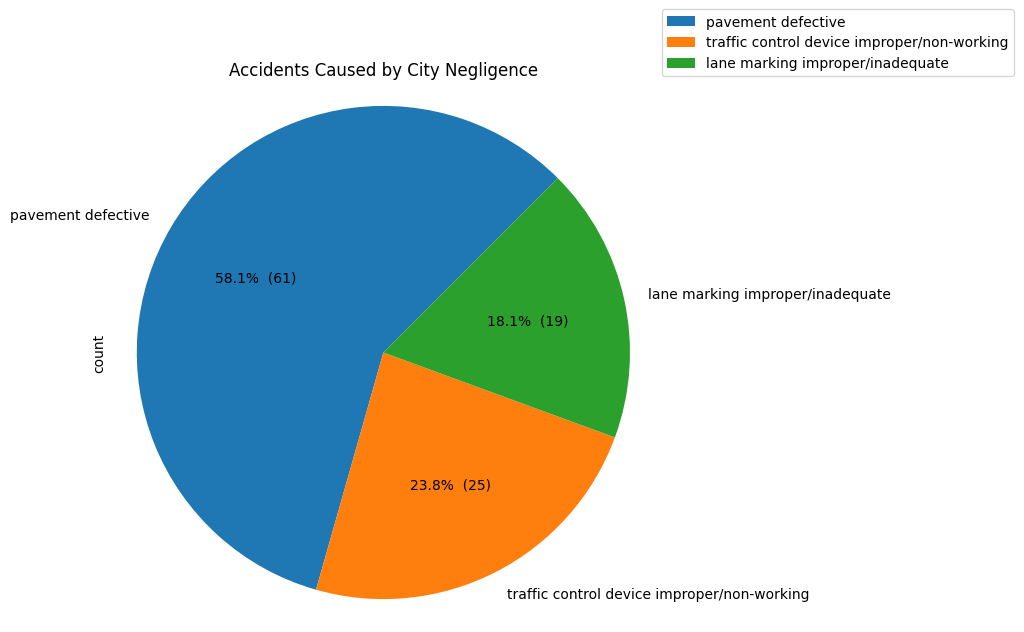

In [807]:
plt.figure(figsize=(7, 7))

# Plot the pie chart
factor_counts.plot(kind='pie', autopct=make_autopct(factor_counts), startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(factor_counts.keys(), loc='lower left', bbox_to_anchor=(1,1))

plt.title('Accidents Caused by City Negligence')
plt.show()

In [812]:
six_months_str

'2023-03-26'

In [814]:
from datetime import date
from dateutil.relativedelta import relativedelta

# calculates 6 months ago as of today
six_months = date.today() - relativedelta(months=+6)
six_months_str = str(six_months) # turn date into a string

# if I spend a lot of time without updating the data, comment the two line of code above and uncomment this one
# six_months_str = '2023-03-26'

city_fault = factors_df[factors_df['CRASH DATE'] > six_months_str]
city_fault['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
pavement defective                             45
traffic control device improper/non-working    19
lane marking improper/inadequate               13
Name: count, dtype: int64

**Contributing Factors Due to City Negligence:**

The data shows some incidents were due to city negligence which includes defective pavement, improper/non-working traffic control devices, and inadequate/improper lane marking. These are infrastructure-related issues for which the city could potentially be held responsible.

- Defective Pavement: 61 incidents
- Improper/Non-Working Traffic Control Device: 25 incidents
- Improper/Inadequate Lane Marking: 19 incidents

Combined, city negligence contributed to 105 accidents, signifying a need for increased attention to infrastructure maintenance and oversight.

**Other Contributing Factors:**

On the other hand, the majority of incidents were due to various other factors, primarily related to driver behavior and external influences. The top three contributors in this category include general unspecified other factors, driver inattention/distraction, and failure to yield the right-of-way.

- Other: 26,057 incidents
- Driver Inattention/Distraction: 16,940 incidents
- Failure to Yield Right-of-Way: 4,471 incidents
...

These factors collectively contribute to the majority of the incidents, indicating the significant role of driver behavior in ensuring road safety.

**Conclusion**
While infrastructure-related issues are certainly contributing to some accidents, the overwhelming majority of incidents are due to other factors, primarily revolving around driver behavior and decisions. This analysis suggests that in addition to addressing infrastructure issues, efforts should be intensely focused on enhancing driver education, awareness, and enforcement of traffic laws to make a substantial impact on road safety.

In [853]:
victim_2023 = df_2023[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

victim_2023

NUMBER OF PERSONS INJURED        37581.0
NUMBER OF PERSONS KILLED           180.0
NUMBER OF PEDESTRIANS INJURED     5921.0
NUMBER OF PEDESTRIANS KILLED        63.0
NUMBER OF CYCLIST INJURED         3613.0
NUMBER OF CYCLIST KILLED            21.0
NUMBER OF MOTORIST INJURED       26281.0
NUMBER OF MOTORIST KILLED           87.0
dtype: float64

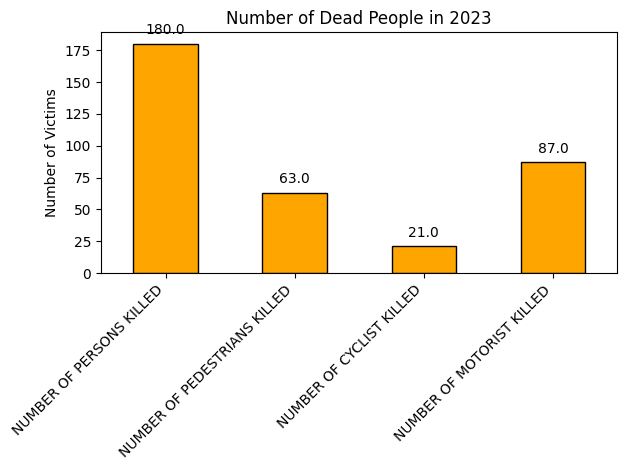

In [868]:
# Plotting
victim_2023_dead = victim_2023.iloc[1::2]

ax = victim_2023_dead.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Dead People in 2023')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the count
for i, v in enumerate(victim_2023_dead):
    ax.text(i, v + 5, str(v), color='black', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

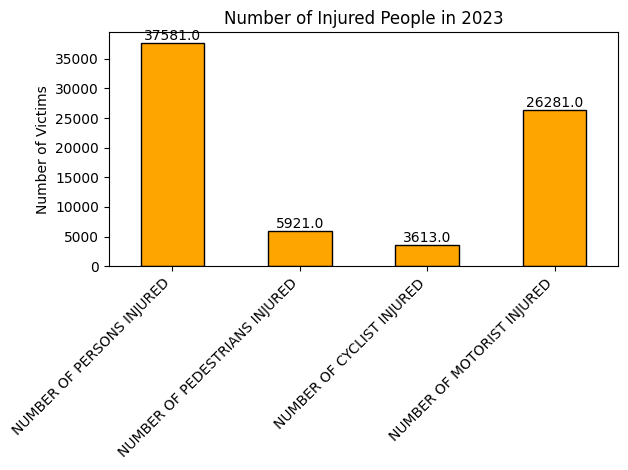

In [869]:
# Plotting
victim_2023_inj = victim_2023.iloc[0::2]

ax = victim_2023_inj.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Injured People in 2023')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the count
for i, v in enumerate(victim_2023_inj):
    ax.text(i, v + 5, str(v), color='black', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df_2022[df_2022['VEHICLE TYPE CODE 1']  == ].value_counts()

In [879]:
df_2023['VEHICLE TYPE CODE 1'].value_counts()

VEHICLE TYPE CODE 1
Sedan                                  30965
Station Wagon/Sport Utility Vehicle    23298
Taxi                                    1739
Pick-up Truck                           1498
Bike                                    1231
                                       ...  
PASSENGER                                  1
truck                                      1
Lunch Wagon                                1
E-scooter                                  1
DUMP                                       1
Name: count, Length: 311, dtype: int64

## 4. Prepare the Data
Notes: 
- Work on copies of the data (keep the original dataset intact).
- write functions for all data transformations you apply, for five reasons:
    - So you can easilly prepare the data the next time you get a fesh dataset
    - So you can apply these transformations in future projects 
    - To clean and prepare the test set
    - To  clean and prepare new data isntances once your solution is live 
    - To make it easy to treat your preparation choices as hyperparameters 
    
1. Data cleaning:
    - Fix or remove outilers (optional)
    - Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).
2. Feature Seelction (optional)
    - Drop the attributes that provide no usefull information for the task.
3. Feature Engineering where appropriate:
    - Discretize continous features. 
    - Decompose features (e.g., categorical, date/time, etc.).
    - Add promissing transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
    - Aggregate features into promising new features 
4. Feature scaling: standardize or normalize features.

### Pipelines

In [1]:
def convert_date_time(df):
    # Convert 'CRASH DATE' to datetime type
    df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

    # Convert 'CRASH TIME' to datetime format and then extract only the time
    df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')
    return df

def extract_date_info(df):
    # breaking down of the crash date column
    df['MONTH'] = df['CRASH DATE'].dt.month
    df['YEAR'] = df['CRASH DATE'].dt.year
    df['WEEKDAY'] = df['CRASH DATE'].dt.weekday
    df['HOUR'] = df['CRASH TIME'].dt.hour
    return df

def map_days_months(df):
    days = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
    # Replacing numbers with day names
    df['WEEKDAY'] = df['WEEKDAY'].replace(days)

    month = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    # Replacing numbers with day names
    df['MONTH'] = df['MONTH'].replace(month)
    
    
    # Specifying the correct order for the days of the week
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['WEEKDAY'] = pd.Categorical(df['WEEKDAY'], categories=days_order, ordered=True)

    # Specifying the correct order for the days of the week
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df['MONTH'] = pd.Categorical(df['MONTH'], categories=month_order, ordered=True)
    
    return df

def vehicle_categories(df):
    df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower().copy()

    replacement_dict = {
        'sedan': ['sedan', 'taxi', '3-door', 'convertible', 'sonata', 'pas (4dr s', 'yellow tax', '2 dr sedan', '4 dr sedan'],
        'motorcycle': ['motorcycle', 'mopad', 'motor scoo', 'motorbike', 'motorized', 'moped 150c', '50cc scoot', 'mopd', 'moped', 'motorscooter'],
        'bicycle': ['bike', 'e-bike', 'e bike', 'e bike w p', 'bicycle', '2 wheel sc', 'pedicab', 'e bike uni'],
        'suv': ['suv', 'station wagon/sport utility vehicle'],
        'emergency_vehicle': ['ambulance', 'amb', 'nys ambula', 'ems', 'ambu', 'fire truck', 'fdny truck', 'firetruck', 'fire', 'fire engin', 'fire truvk', 'nypd', 'police veh', 'nypd tow t', 'ems truck', 'fdny ambul', 'emt ambula', 'fdny ladde', 'ambulace', 'abulance', 'ambulette', 'fire appar', 'fdny engin'],
        'truck': ['box truck', 'pick-up truck', 'flat bed', 'pick-up', 'garbage truck', 'tractor truck', 'tow truck', 'tractor truck gasoline', 'chassis cab', 'dump', 'tow', 'usps', 'tow truck / wrecker', 'tanker', 'hopper', 'usps truck', 'trailer', 'commercial', 'dump truck', 'road sweep', 'ford picku', 'pickup', 'pickup tru', 'pick up tr', 'tractor truck diesel', 'pick-up tr', 'pick up', 'truck', 'delivery', 'us postal', 'mail truck', 'freight', 'freight tr', 'freightlin', 'frieg', 'fedex truc', 'usps  van', 'fed ex tru', 'work truck', 'pickup with mounted camper', 'delivery t', 'delivery v', 'bucket tru', 'dumptruck', 'usps small', 'utility tr', 'u-haul', 'citywide', 'fdny ems', 'truck w/tr', 'tractor tr', 'penske box'],
        'bus': ['bus', 'school bus', 'mta bus', 'nyc transi', 'schoolbus', 'ems bus', 'nj transit', 'transit'],
        'van': ['van', 'minivan', 'mini van', 'van truck', 'van camper', 'refrigerated van', 'sprinter v', 'usps van', 'nycha van', 'sprinter w', 'mail', 'nyc sanita', 'verzion va', 'city of ne', 'city vehic', 'postal tru', 'postal ser', 'city owned', 'limousine', 'usps mail', 'limo'],
        'utility_vehicle': ['utility', 'carry all', 'bulk agriculture', 'uspcs', 'usps mail', 'lift', 'garbage or refuse', 'power shov', 'forklift', 'cat forkli', 'fork lift', 'lift boom', 'tractor', 'well driller', 'utility ve', 'ny city mt', 'fedex box', 'utility_vehicle', 'util', 'fedex box'],
        'other': ['unk', 'unknown', 'other', '.', 'self', 'tl', 'rz', 'd2', '7', 'sweeper', '999', '997', 'a,n', 'ss', 'psd', 'app', 'pallet', 'trolley ri', 'com', 'stak', 'commerical', 'government', 'promaster', 'con ed tru', 'ele motorc', 'armored truck', 'revel', 'tcn', 'log', 'tr', 'spr', 'mac', 'p psd', 'mta', '100th truc', 'sanitation', 'fdny', 'self insur', 'food cart', 'concrete mixer', 'house on w', 'snow plow', 'bobcat', 'backhoe', 'excavator', 'gator 4x4', 'beverage truck', 'asphalt ro', 'golf cart', 'lunch wagon', 'stake or rack', 'livestock rack', 'enclosed body - nonremovable enclosure', 'open body', 'flatbed to', 'usps posta', 'f550 esu r', 'fdny fire', 'backhoe re', 'scooter', 'e-scooter', 'gas scoote', 'razor150 m', 'motorized home', 'motorscoot', 'e scooter', 'ice cream', 'jetski', 'skateboard', 'multi-wheeled vehicle', 'minibike', 'minicycle', '50cc mini', 'mopped', 'dirt bike', 'chassis &', 'road sweep', 'motorized home', 'pickup', 'in line sk', 'electric s', 'ems fdny b', 'com delive', 'pass', 'rmp', 'fd truck', 'govt', 'pepsi deli', 'combinatio', 'crf carria', 'tlc', 'petit cab', 'mta van', 'gas moped', 'mail carri', 'principle', 'garbage', 'garbage tr', 'nyc parks', 'sp purpose', 'ups truck', 'street', 'mack', 'street swe', 'utility tr', 'rv', 'motorized home', 'gmc ecom', 'yw school', 'f550', 'suburban', 'pk', 'flat rack', 'ford', 'passenger', 'utv', 'tank', 'm2', 'carriage', 'delv']
    }

    # Reverse the mapping to create the replacement dictionary for the replace() function
    replace_dict = {old: new for new, old_list in replacement_dict.items() for old in old_list}

    # Use the replace() function to update the DataFrame in place
    df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].replace(replace_dict)
    df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].replace(replace_dict)
    df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].replace(replace_dict)
    df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].replace(replace_dict)
    df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].replace(replace_dict)
    
    return df

def factor_categories(df):
    df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower().copy()

    factor_replacement_dict = {

        'electronic distractions': [
            'cell phone (hand-held)', 'cell phone (hands-free)', 'distractions',
            'texting', 'listening/using headphones', 'other electronic device'
        ],
        'impairments': [
            'fatigued/drowsy', 'alcohol involvement', 'lost consciousness', 'illnes',
            'prescription medication', 'illness', 'drugs (illegal)', 'fell asleep',
            'eating or drinking'
        ],
        'external_factors': [
            'outside car distraction', 'view obstructed/limited', 'glare',
            'obstruction/debris', 'reaction to uninvolved vehicle', 
            'reaction to other uninvolved vehicle', 'pavement slippery'
        ],
        'vehicle_defects': [
            'brakes defective', 'tire failure/inadequate', 'accelerator defective',
            'steering failure', 'tow hitch defective', 'headlights defective', 
            'other lighting defects', 'windshield inadequate', 'shoulders defective/improper'
        ],
        'other': [
            'oversized vehicle', 'physical disability', 'pedestrian/bicyclist/other pedestrian error/confusion',
            'passenger distraction', 'animals action', 'driverless/runaway vehicle',
            'using on board navigation device', 'vehicle vandalism','traffic control disregarded', 
            'unsafe speed', 'unspecified', 'other vehicular', 'tinted windows', 'vehicle_defects', 
            'driver inexperience'
        ]
    }

    # Reverse the mapping to create the replacement dictionary for the replace() function
    factor_replace_dict = {old: new for new, old_list in factor_replacement_dict.items() for old in old_list}

    # Use the replace() function to update the DataFrame in place
    df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].replace(factor_replace_dict)
    df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].replace(factor_replace_dict)
    df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].replace(factor_replace_dict)
    df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].replace(factor_replace_dict)
    df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].replace(factor_replace_dict)
    
    return df


# ... other functions ...

def pipeline(df):
    df = convert_date_time(df)
    df = extract_date_info(df)
    df = map_days_months(df)
    df = vehicle_categories(df)
    df = factor_categories(df)
    # ... call other functions ...
    return df


In [4]:
# Usage
df = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes.csv", dtype={3: 'str'})

In [5]:
df = pipeline(df)
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,YEAR,WEEKDAY,HOUR
0,2021-09-11,1900-01-01 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,4455765,sedan,Sedan,NaN,NaN,NaN,September,2021,Saturday,2
1,2022-03-26,1900-01-01 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,4513547,sedan,NaN,NaN,NaN,NaN,March,2022,Saturday,11
2,2022-06-29,1900-01-01 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,4541903,sedan,Pick-up Truck,NaN,NaN,NaN,June,2022,Wednesday,6
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,4456314,sedan,NaN,NaN,NaN,NaN,September,2021,Saturday,9
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,4486609,NaN,NaN,NaN,NaN,NaN,December,2021,Tuesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026879,2023-07-03,1900-01-01 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,4648110,sedan,Sedan,NaN,NaN,NaN,July,2023,Monday,18
2026880,2023-07-22,1900-01-01 21:39:00,BRONX,10457,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,4648117,sedan,NaN,NaN,NaN,NaN,July,2023,Saturday,21
2026881,2023-07-02,1900-01-01 17:55:00,MANHATTAN,10006,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,4648366,sedan,NaN,NaN,NaN,NaN,July,2023,Sunday,17
2026882,2023-07-22,1900-01-01 13:15:00,QUEENS,11433,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,4648129,suv,E-Bike,NaN,NaN,NaN,July,2023,Saturday,13


In [883]:
# # columns has to be in float type for the heat map
# df_2023['LATITUDE'] = df_2022['LATITUDE'].astype(float)
# df_2023['LONGITUDE'] = df_2022['LONGITUDE'].astype(float)

# # filtering data by contributing factors and most recent crashes
# heat_df = df_2022.sample(frac=0.003)

# # Setting the initial top view
# map = folium.Map(location=[40.7765753, -73.830104], zoom_start = 11)

# # border styles
# bordersStyle = {
#     'color': 'black',
#     'weight': 2,
# }

# # Collects the information from the borders locate it in a geojson file
# folium.GeoJson(
#     data=(open("borders.geojson", 'r').read()),
#     name='Borders',
#     style_function=lambda x: bordersStyle).add_to(map)

# # generating the dataframe with Lat and Long
# heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in heat_df.iterrows()]

# # Ploting the heat map
# HeatMap(heat_data, name='Heatmap').add_to(map)

# # add borders over the map
# folium.LayerControl().add_to(map)
# map

In [435]:
from sklearn.preprocessing import OneHotEncoder

In [471]:
cat_years = year_counts_df[['YEAR']]
cat_years

,YEAR
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018
6,2019
7,2020
8,2021
9,2022


In [472]:
encoder = OneHotEncoder()
cat_years_1hot = encoder.fit_transform(cat_years) 
cat_years_1hot

<11x11 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [479]:
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:
cat_years_1hot.toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [474]:
encoder.categories_

[array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

## 5. Short-List Promissing Models 
Notes: 
- if the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these stesps as much as possible.

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, Neural Net, etc.) using standard parameters.
2. Measure and compare their performance.
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of the peformance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the type of errors the models make.
    - What data would a human have used to avoid these errors?
5. Have a quick round of feature selection and engineering.
6. Have one or two more quick iterations of the five previous steps.
7. Short-list the top three to five to most promising models, preferrign models that make different types of erros.

## 6. Fine-Tune the System
Notes: 
- You will want to use as much data as possible for this step, specially as you move toward the end of fine-tunning.
- As always automate what you can.

1. Fine-tune the hyperparameters using cross-validation.
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or with the median value? Or just drop the rows?).
    - Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors).
2. Try Ensemble methods. Combining your best models will often perform better than running them individually. 
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

**Note:** Don't tweak your model after measuring the generalization error: you would just start overfittign the test set. 
    

## 7. present Your Solution

1. Document what you have done.
2. Cerate a nice presentaion.
    - Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don't forget to present interesting points you noticed along the way.
    - Describe what worked and what did not.
    - List your assumptions and your system's limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remenber statements (e.g., "the median income is the number-one predictor of housing prices").

## 8. Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your systems' live performance at regular intervals and trigger alerts when it drops.
    - Beware of slow degradation too: models tend to "rot" as data evovles.
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
    - Also monitor your inputs' quality (e.g., malfunctioning sensor sending random values, or another teams' output becoming stale). This is particularly important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as possible).